In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data_path = '/content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/Raw_data/91APP_OrderSlaveData.csv'
OrderSlave_df = pd.read_csv(data_path)
OrderSlave_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,9,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
0,qWx6GCCCZKomc8zGVDH5sg==,0dvth9fOhsjExdrrVu8Pnb6butGfnNMPkXLe2iyBQTw=,SIjUzoDlAcmGEVpWFFlYCjMPZtgrG4TKl2x+fv5pXKg=,Gb2oMLGj3lybaHECFSgZhgXAeuOgUHgnPSN9SHckQGw=,2021-09-06 23:06:41.613,2021-09-07 00:43:03.320,OfficialECom,AndroidApp,Aftee,FamilyPickup,...,+OU4hbuArrFxUiZYBkQ8wA==,K6P1Zxi3Qzl0Cp2Xnee2hA==,1,1680.0,1548.0,1680,-132,0.0,0,Cancel
1,80M/d8GN2HlxDuvGdt4Wew==,22iTX0IdRottpcwiv+A/Nttjm4Z4E41MNXTizaqlqlc=,H6/FHZ4HyFWFrd/094ln2W/Rgb0ddxxLta+a/K0NXd8=,vdldHpIlfikOTfctgRoR/zucejIMIscM/iqlS4iNWCc=,2021-09-19 13:42:02.510,2021-09-19 13:42:02.540,OfficialECom,iOSApp,Aftee,Home,...,guiAN2+X6QalLODS8SnjCw==,IGzTAZOwgmZJINsk1yZZvw==,1,1880.0,1131.0,1880,-749,0.0,0,Fail
2,183befUhGBlsXXVQsFUqmQ==,5Bd73SAeGSyFaSgcyBGuTO7D09mWqKXefycVfosJGgc=,Esf9q59OO5QVU6Rapl8m7t8Lyu1MshueQOEyRRXEwU8=,UWEmDoRi4RwxXkhq3QExkDxKzzYmqbXzdwf0v7R8ESg=,2021-09-25 15:14:23.817,2021-10-01 17:41:03.280,OfficialECom,iOSApp,Aftee,FamilyPickup,...,GhBVVjQkmw/lUFHixaRhMA==,mOaExE4IHwxs+3oxwPH6vQ==,1,2080.0,1772.0,2080,-208,-100.0,0,Finish
3,eIAAc3OD109E/1pUzsrlyw==,G6N1d1CLZf4ZNbCrQ189AzxGVgEfzvZJymAEaAaYbOk=,Unhjy1kwUn//ue9hwYphIe/DuIc6rgtqrEl0Av1Cdvo=,7O20hwaCD8C0i6WmoU3lFlEgX8hMMLbvswMU9u26KL4=,2021-10-06 00:01:43.080,2021-10-06 00:35:02.487,OfficialECom,AndroidApp,Aftee,FamilyPickup,...,YvHmKW7tZSC1Q2yurGyPOw==,G08xXJsLA+nJsdLUcNrGjw==,1,1680.0,1496.0,1680,-84,-100.0,0,Cancel
4,V8aANSIiYMcvOww9zbt4xg==,4BiWovhXmL6mvRv33iAxDi9HJaDtF5jv0u+q7BVFaoU=,Om2GMKGy4xW/dBgbjEjdoUCOuuzBbRKIs75/SGMB7Ec=,2fxkEmUs/zEYMzuV+7PNyW0eVZAMT7FrT+i81fhXD3M=,2021-10-19 22:04:37.470,2021-10-19 22:39:07.433,OfficialECom,MobileWeb,EasyWallet,SevenElevenPickup,...,N3Czs+LffzmECb4D+tB/yg==,C6Y1fxqscXNt3ldQL6uCIQ==,1,1780.0,1780.0,1780,0,0.0,0,Cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542838,SKbcGryUfvjp0wvMo3Ozdg==,Ca8NrppsCauf6TbpnoOUBBZ2EdsHQpUfyWUm6/Mczi0=,gBqkL1Zx+x7lbtry5klt5IsvdkOxMgjWDdnyGCGs0Mo=,vMj0rOwWTY9izMpATqwTl3b9CSgE2k43s1bKWPGQYTI=,2022-04-17 16:07:35.333,2022-04-18 12:14:05.053,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,RP70bK5/pzlkKTz8tshW6A==,bkLbDMDo5AzAKZaTraADBw==,1,1980.0,1467.0,1980,-513,0.0,0,Finish
1542839,/ai+mCh12HoGuDznO0Bczw==,Jo1pZaUMLpMwron9HRBXDQK6155guipPpplFdgdugx0=,ykgGbdc5i16MZyGEX0imDnYX5PWU0p92yv3q/Q4zdIg=,bYVKmLK+19lt03q1jYBZH8kXJrj20+yNtr3KboyDTY8=,2022-04-25 23:16:10.370,2022-04-26 11:16:43.060,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,ns6Uvd5MGmPY2uZbvWqnnw==,QjpZgMqXonUDOUnJw1SLWw==,1,1480.0,1430.0,1480,0,-50.0,0,Finish
1542840,HGINRVTqMe7IJRVQk8Dsqw==,pVDm4H5qw9Mj9OtwjIaa8zqMfy3ptlFLqLSVf0MEIEc=,Ig7BcxfvJmevMS7gC0/vHd/sR6sPjddbBX2Ct+vtYPY=,5n0Afi21QRp+Bcm7GjRefld0Xo2BXBfF8MbpDQ0wzO8=,2022-04-28 11:51:36.947,2022-05-01 20:16:48.953,OfficialECom,MobileWeb,CreditCardInstallment,HiLifePickup,...,m1AfcEYViVhG4ebmRmOnwg==,uJXE0TJ9QF4nvVRuP/+DDw==,1,1380.0,1211.0,1380,-69,-100.0,0,Finish
1542841,6czqGa0HosjNlVrpDOtfQg==,iykraM0fIy0u3ftEbEVJLXEspFIjcj/nuOhKUnt0sRU=,Z0tUvlmwFvhXzDlb6D98a3gzVrXhohE3Jvdm4iV1OFI=,MLvTrnhIxq275f2af7kGhGzOiHVifnAQvl4BAzDMqhg=,2022-04-29 12:48:36.833,2022-04-29 16:27:18.743,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,8uZFLivsLMMmHXbMlHUT3Q==,9UTo2wl4FnOptiz3BDK5Fw==,1,1680.0,1320.0,1680,-160,-200.0,0,Finish


In [ ]:
OrderSlave_df[OrderSlave_df['TradesSlaveCode'] == 'r0rPbXhZ3IBzLUTmzuhBVA=='].groupby('MemberId')

## 抓某一時間段的數據

In [ ]:
pd.to_datetime(OrderSlave_df['OrderFinishDateTime']).max()

Timestamp('2022-05-04 21:41:12.537000')

In [ ]:
# 將'OrderFinishDateTime'從object轉成datetime
OrderSlave_df['OrderFinishDateTime'] = pd.to_datetime(OrderSlave_df['OrderFinishDateTime'])
OrderSlave_df.sort_values(['OrderFinishDateTime'])

,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
1371673,gTBzWHNEhgZnGGKIFCj9aQ==,GVEsjYQcZdsHw6iLAQu0V7Zl79FSeV5JV0T1joz2BC4=,1iebUt19r1NTfATSpy4cgXW0iv4NPmWXe+eFpZlLEok=,xMOffT1wKArpyGE4D5cHdTkoX57ChBhWsXwSBeCPFpQ=,2013-09-30 14:14:26.587,2013-09-30 14:24:01.703,Mall,DesktopOfficialWeb,CreditCardOnce,Home,...,P4eIvuOb2Axy2ChW3QHkRQ==,hvLaUqrmI3Fy06466UTyGQ==,1,29.0,29.0,29,0,0.0,0,Cancel
1337140,gTBzWHNEhgZnGGKIFCj9aQ==,GVEsjYQcZdsHw6iLAQu0V7Zl79FSeV5JV0T1joz2BC4=,1iebUt19r1NTfATSpy4cgXW0iv4NPmWXe+eFpZlLEok=,xMOffT1wKArpyGE4D5cHdd9dO+HJoB5di+0L40agcQs=,2013-09-30 14:14:26.587,2013-09-30 14:24:02.733,Mall,DesktopOfficialWeb,CreditCardOnce,Home,...,0gnN55wkJKJnlc7cRRDa6Q==,GGUeu+F3s0n9uCqbAiBBXA==,1,499.0,499.0,499,0,0.0,0,Cancel
1208877,gTBzWHNEhgZnGGKIFCj9aQ==,GVEsjYQcZdsHw6iLAQu0V7Zl79FSeV5JV0T1joz2BC4=,1iebUt19r1NTfATSpy4cgXW0iv4NPmWXe+eFpZlLEok=,xMOffT1wKArpyGE4D5cHdXt0y6LvUKkBl1K8kskeSVA=,2013-09-30 14:14:26.587,2013-09-30 14:24:03.807,Mall,DesktopOfficialWeb,CreditCardOnce,Home,...,coIBs1xBV2Jy/91Mti3bzA==,uWhXUEY+Rc1Rp4qRIBfDmQ==,1,999.0,999.0,999,0,0.0,0,Cancel
1252700,QEvAUrRHw4mlifqLtDmSkg==,qlYoM/nk5SSBMrw+h+UgR9w2mM99eHqbrfCFGRdpwaQ=,WVKJ8zN9DWH6s2Ft5amP5ywNjyXMSJWMXY5QEEBBUEY=,CeyPclcFe0JRUvzOGwZkp5x+AL94S4GTX61cHPl0fWc=,2013-09-30 20:30:18.603,2013-09-30 20:36:01.413,OfficialECom,iOSApp,CreditCardOnce,Home,...,a8QcQ0iZO62M1eLjyrMWCw==,GGUeu+F3s0n9uCqbAiBBXA==,1,499.0,499.0,499,0,0.0,0,Cancel
1381322,wgF7IRA+OcG+ymdBpZf4zA==,w3oq+QsQezoJL7d85U0v2Zj+/BFPIpN12bmMJ1I9FOI=,7iGmmLxnrg2FMB0D7mUcMSgNkuoIMKvO/+xaE5jNkpc=,7jgqXEjLdXufTz1oSBLz6iB7GeUfLj86oqILHfdP8Pw=,2013-09-30 21:44:47.100,2013-09-30 21:44:47.320,OfficialECom,iOSApp,CreditCardOnce,Home,...,/cYeEfX9jrRg8BRXqixfIw==,KO+T/LaariWpGf9xrrsmdQ==,1,999.0,999.0,999,0,0.0,0,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846432,Fh5wkyMpIFXv6DurBCubBA==,RIp1XbcAyqq39mSCz+MdAKNBC1KHhDBIEwc1PXIux6I=,pbQLWHwW2sABFxnFMn1w9op5FRKLA9kj/tiPL5Q/bX8=,lUzs4dOAeH57UhxFOyLf01gsql7ZQ9RWXm8RnDf045U=,2022-04-19 22:40:46.467,2022-05-04 21:30:28.527,OfficialECom,MobileWeb,Family,Family,...,tkhsSY7RIqvCFgJhtnJq4A==,DpKDUHKWs5PcQUFQpjlRrw==,1,0.0,0.0,0,0,0.0,0,Overdue
1442741,lZf//5wrFox91vQTOMqQ7Q==,0GokKRDnuqUAZDcRQFOjdV6RFpBE0eJQ4fb8ri6yGds=,SpCfl+eBS11rjZsl/KJ+NcFzdRgH7UWVsXM987F5n4E=,ppjHCwVT88RHLB7PY63BJnNOMP+QBmiMs6hb5fZIXek=,2022-03-31 21:04:52.113,2022-05-04 21:41:08.293,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,...,pibHEVJr2IfIRj6InIcdIg==,qUtU/e9J5P7O9Cl6Bva0vg==,1,1980.0,1620.0,1980,-198,-162.0,0,Finish
1438177,lZf//5wrFox91vQTOMqQ7Q==,0GokKRDnuqUAZDcRQFOjdV6RFpBE0eJQ4fb8ri6yGds=,SpCfl+eBS11rjZsl/KJ+NcFzdRgH7UWVsXM987F5n4E=,ppjHCwVT88RHLB7PY63BJpQcEwxZ9pjQ5H+XiYr7BX4=,2022-03-31 21:04:52.113,2022-05-04 21:41:12.537,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,...,tNFWRBB2wIqh9KW+t3uqxg==,CrSTcRGe482VVhEOrDtoBA==,1,349.0,349.0,349,0,0.0,0,Finish
1476823,lZf//5wrFox91vQTOMqQ7Q==,0GokKRDnuqUAZDcRQFOjdV6RFpBE0eJQ4fb8ri6yGds=,SpCfl+eBS11rjZsl/KJ+NcFzdRgH7UWVsXM987F5n4E=,ppjHCwVT88RHLB7PY63BJnCtvKWJSMH5rvgZ6Q+nK+c=,2022-03-31 21:04:52.113,2022-05-04 21:41:12.537,OfficialECom,iOSApp,CreditCardInstallment,FamilyPickup,...,9vcToLPn2a/6R4Qr3F4zUw==,IzU12jMefxR3L9hgPTsI+Q==,1,0.0,0.0,0,0,0.0,0,Finish


In [ ]:
# 獲得起始結束時間範圍内的數據
def time_period(start:str, end:str, df):
  '''
  start end 格式：%Y-%m-%d %H:%M:%S
  是根據"OrderFinishDateTime"來選擇時間區間
  '''
  s_date = datetime.datetime.strptime(start, '%Y-%m-%d %H:%M:%S').date()
  e_date = datetime.datetime.strptime(end, '%Y-%m-%d %H:%M:%S').date()
  return df[(df.OrderFinishDateTime > pd.Timestamp(s_date)) & (df.OrderFinishDateTime < pd.Timestamp(e_date))]

In [ ]:
time_period('2020-05-04 00:00:00', '2021-05-04 00:00:00', OrderSlave_df)

,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
204,l3vq3VUaKPH9FRHmTgSm/A==,5HvOjBbq2zKgSo18//vC7bxlBuvIJm37NLmDAnoEh5o=,8eRRWjWuYHuk9IyGudMBq5F+7AxqbB1JcWaqkyfq2YY=,QyH/9uzo2sOcM6Vbrr9zi4YuMssvVRwtH5y2Ls8UbFs=,2021-04-23 14:10:26.810,2021-05-03 18:13:03.633,OfficialECom,DesktopOfficialWeb,HiLife,HiLife,...,IJqEHWDTYdNotSVSL0W+BA==,6OPxIbYmjsX9Ec3wDKVjkA==,1,1380.0,1173.0,1380,-207,0.0,0,Cancel
1880,l3vq3VUaKPH9FRHmTgSm/A==,5HvOjBbq2zKgSo18//vC7bxlBuvIJm37NLmDAnoEh5o=,vYpOh7vH5mgN3Ars0dPUxN8BLSjjvdNpZbvxUhw2toE=,8KgzBKf5bVA1yYPZflrBC8y+yp8pa7O2uGzxEMltCis=,2021-04-21 14:18:19.690,2021-04-23 14:09:05.720,OfficialECom,MobileWeb,HiLife,HiLife,...,gKUvIA+/8C3XMmNda7lztQ==,TcdKXbBXTwfwbrawxclT0g==,1,3600.0,2860.0,3600,-540,-200.0,0,Cancel
2401,l3vq3VUaKPH9FRHmTgSm/A==,5HvOjBbq2zKgSo18//vC7bxlBuvIJm37NLmDAnoEh5o=,vYpOh7vH5mgN3Ars0dPUxN8BLSjjvdNpZbvxUhw2toE=,8KgzBKf5bVA1yYPZflrBC+HhLuIA5iSrAz+ymcbBnwg=,2021-04-21 14:18:19.690,2021-04-23 14:09:05.630,OfficialECom,MobileWeb,HiLife,HiLife,...,KYeqwOZ8PAA9v7tLqfrTxA==,dxgm4J6ob0gO931Hp+VqWA==,1,0.0,0.0,0,0,0.0,0,Cancel
9150,mK4Wim2iBrERAQZ72ZQKsw==,APFV5m3lgiOA+0OtRfuUGcxQOKvhG+2sxiY+7g5lQDk=,jZ3+DW6YwUkZHUOzyKCgBCHQRwpzIz7P/o/4ghARSmc=,AjO35+btOSM7HK8ECDQVPw==,2020-05-04 21:50:00,2020-05-04 21:50:00.000,Pos,003,NaN,NaN,...,NaN,NaN,1,1480.0,1480.0,1480,0,0.0,0,Finish
9151,5zwixjSZy4U1L/yu/g8q0w==,DfhDGr6n4K4qVm9SkU/Y89WavVH8OVdpy4tP9N5tTno=,awytKXyd2XkgC11mmmEIHKbOOM7NAQxfrM+QIXTBe4Q=,Kh0trK0K3x1v6TJ0AmqM4g==,2020-05-04 19:57:00,2020-05-04 19:57:00.000,Pos,024,NaN,NaN,...,NaN,NaN,1,1680.0,1680.0,1680,0,0.0,0,Finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542599,FpT00Kg7wER+Mgnh4h36bg==,gslu85CAtBMIxHdNn4gKVVjhxx8q5JEB7B/0wAtp8ms=,CDD13txYA6fg0hwz0GUrWJjMlAQqA1jQdmeBLg2l6No=,my0hYeZ0qhl2pHP25KEAev0lRbs/ArV2VxcpvRjLGxA=,2021-04-19 22:40:17.600,2021-04-19 22:40:17.647,OfficialECom,iOSApp,CreditCardInstallment,Home,...,tSjccBPpg31FiUicHTB5BQ==,hi57Fa07xUZq1GhuW6WvBQ==,1,1680.0,1596.0,1680,-84,0.0,0,Fail
1542600,Rykb/6GmqoihcLRO616/qA==,tz4Mdb+GHh0V5821d7Kz8wMnnsp+4gMA4x66bU4NZbQ=,z3jA34RJ9iFLX+DLarKuhDYjkulF981eZ0nyMOctEqY=,+KDBD4JVxvMxz4e0TNR4Io2hIjRKj/D0CnEfvjiPwNI=,2021-04-19 14:55:04.957,2021-04-26 17:48:33.743,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,bmJum6eawHWyLGveYd2UnQ==,KlbX61p7raumcuRqzbN6+w==,-1,1680.0,-1596.0,-1680,84,0.0,0,Return
1542601,b28KaYijTsCG1s0cy2Em4w==,NbEFLFKk3ZMGtIs1mrm68+pHqJhxKMaT0uihLy3p2So=,XnbE2LCtE09hIiaWUQ7A3VmqwdUQuqYWc8qowWARicM=,cKxU4C1hvc+6+gxzrHDML94LFmLnUMzXZi1wEwFp7BY=,2021-04-27 21:44:07.993,2021-04-28 11:05:32.717,OfficialECom,MobileWeb,CreditCardInstallment,Home,...,6sVQuIOg4QZ/N5J2s/r8RA==,KCY+NT/VlPr67ILUmIMjpw==,1,2280.0,2200.0,2280,-80,0.0,0,Finish
1542602,Vqs7pcelvidAfPcQkWcmgA==,aERcdo8PMiw4S8rjSibMz4j2RsaKm6s4LIDQFDVYiFc=,fqLXvAh8PMUekhwPvr7SqsKP9+l+6wpquYiSCGOY8JQ=,FNCZhbeCAjYjBWjD9ghg6ujfILZClhc4s6r4tKyI9RU=,2021-04-28 11:38:15.260,2021-04-28 14:18:49.250,OfficialECom,iOSApp,CreditCardInstallment,Home,...,5rIzuH7MEy4gqw7v4snKlA==,OLW1zc87Ieh7tmhZE+s+yg==,1,1680.0,1530.0,1680,0,-150.0,0,Finish


## 處理recency

In [ ]:
proceeded_data = OrderSlave_df[OrderSlave_df['StatusDef'].str.contains('Finish') | OrderSlave_df['StatusDef'].str.contains('Return')]
proceeded_data

,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
2,183befUhGBlsXXVQsFUqmQ==,5Bd73SAeGSyFaSgcyBGuTO7D09mWqKXefycVfosJGgc=,Esf9q59OO5QVU6Rapl8m7t8Lyu1MshueQOEyRRXEwU8=,UWEmDoRi4RwxXkhq3QExkDxKzzYmqbXzdwf0v7R8ESg=,2021-09-25 15:14:23.817,2021-10-01 17:41:03.280,OfficialECom,iOSApp,Aftee,FamilyPickup,...,GhBVVjQkmw/lUFHixaRhMA==,mOaExE4IHwxs+3oxwPH6vQ==,1,2080.0,1772.0,2080,-208,-100.0,0,Finish
5,5aRn4GBf1opsUUHmYIKYUQ==,ZLno3QlClWoO9qsKcpKBK7tfjCEolP80D8ddS/zGDa4=,wTDcVew4UUsw/a9ag6EtoIKd4dp+bPyvV3n7jJZag0w=,n5aCi/P0rsWYUY/EL1bEoD+vt2jVi53rUfey2tpDWr0=,2021-10-20 23:16:53.060,2021-10-27 06:08:06.577,OfficialECom,iOSApp,Aftee,FamilyPickup,...,7zYE8rM/3vWAGugrEgKjAg==,+DKc6LrFNgcY5eQf323ivA==,1,2180.0,1910.0,2180,-218,-52.0,0,Finish
6,VDhO3SXBuocL6RK9PsXWMw==,Bp3EKrr6Xuks1Q085n7FmlLtYL2RQ8etuedkU5ocnOM=,3uq44BE2pVcqbv+OgCeNtBQycM8O7Ncy6cqzWo/Wbew=,rK1NDsJFCYxc16tiDMAfjumNSMoDAVDi6vsUiz7ycR0=,2021-10-20 15:07:53.747,2021-10-25 22:18:27.483,OfficialECom,MobileWeb,HiLife,HiLife,...,F1UMJo1nWuPP25TkLH1/Pg==,ixSvJV6ktq9JOMrTgj0g/w==,1,199.0,199.0,199,0,0.0,0,Finish
7,eIGtuQBny6E1+kCTsrGzvg==,9IPO9aGEqjyIjlxcJu4Mr/6f+A1F3mDymDYh74Ct+dc=,RrQtLHyOzu/tyeo3CeGzh8WP8Yvg7AC7H0yLKfiXkSM=,XUJf+5lf7S2Or9CXP+BATspzKr2IGoDboWT173PitQU=,2021-10-24 00:42:09.310,2021-10-25 15:06:19.423,OfficialECom,iOSApp,Aftee,Home,...,RIBteERiI7Rie0T9sENJGw==,HNIBK18uGGLfUuyvahvw3w==,1,1980.0,1762.0,1980,0,-218.0,0,Finish
14,AlyUS7LorP1qdJwahdia0w==,WyLJCYsILh5wgrUtPG2x5yK44TnoxTIu3GTQpKXFkFU=,INCAQve0tgt0rreQxESbeSQd6av/WomiJvHRPPM99C0=,ph/YD+ZoJsuYYp00bVE77Nx8+BJcCdE2rTtIfsnWMJ4=,2021-11-13 21:49:11.537,2021-12-13 10:33:35.027,OfficialECom,iOSApp,HiLife,HiLife,...,w//5KVXmYNz6HhPDM2WD0w==,xzii0zdIQQ8VDN40a3wUiA==,1,980.0,99.0,980,-881,0.0,0,Finish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542838,SKbcGryUfvjp0wvMo3Ozdg==,Ca8NrppsCauf6TbpnoOUBBZ2EdsHQpUfyWUm6/Mczi0=,gBqkL1Zx+x7lbtry5klt5IsvdkOxMgjWDdnyGCGs0Mo=,vMj0rOwWTY9izMpATqwTl3b9CSgE2k43s1bKWPGQYTI=,2022-04-17 16:07:35.333,2022-04-18 12:14:05.053,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,RP70bK5/pzlkKTz8tshW6A==,bkLbDMDo5AzAKZaTraADBw==,1,1980.0,1467.0,1980,-513,0.0,0,Finish
1542839,/ai+mCh12HoGuDznO0Bczw==,Jo1pZaUMLpMwron9HRBXDQK6155guipPpplFdgdugx0=,ykgGbdc5i16MZyGEX0imDnYX5PWU0p92yv3q/Q4zdIg=,bYVKmLK+19lt03q1jYBZH8kXJrj20+yNtr3KboyDTY8=,2022-04-25 23:16:10.370,2022-04-26 11:16:43.060,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,ns6Uvd5MGmPY2uZbvWqnnw==,QjpZgMqXonUDOUnJw1SLWw==,1,1480.0,1430.0,1480,0,-50.0,0,Finish
1542840,HGINRVTqMe7IJRVQk8Dsqw==,pVDm4H5qw9Mj9OtwjIaa8zqMfy3ptlFLqLSVf0MEIEc=,Ig7BcxfvJmevMS7gC0/vHd/sR6sPjddbBX2Ct+vtYPY=,5n0Afi21QRp+Bcm7GjRefld0Xo2BXBfF8MbpDQ0wzO8=,2022-04-28 11:51:36.947,2022-05-01 20:16:48.953,OfficialECom,MobileWeb,CreditCardInstallment,HiLifePickup,...,m1AfcEYViVhG4ebmRmOnwg==,uJXE0TJ9QF4nvVRuP/+DDw==,1,1380.0,1211.0,1380,-69,-100.0,0,Finish
1542841,6czqGa0HosjNlVrpDOtfQg==,iykraM0fIy0u3ftEbEVJLXEspFIjcj/nuOhKUnt0sRU=,Z0tUvlmwFvhXzDlb6D98a3gzVrXhohE3Jvdm4iV1OFI=,MLvTrnhIxq275f2af7kGhGzOiHVifnAQvl4BAzDMqhg=,2022-04-29 12:48:36.833,2022-04-29 16:27:18.743,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,8uZFLivsLMMmHXbMlHUT3Q==,9UTo2wl4FnOptiz3BDK5Fw==,1,1680.0,1320.0,1680,-160,-200.0,0,Finish


In [ ]:
proceeded_data_real = time_period('2021-05-04 00:00:00', '2022-05-04 00:00:00', proceeded_data) #2022資料
proceeded_data = time_period('2020-05-04 00:00:00', '2021-05-04 00:00:00', proceeded_data) #2021資料

In [ ]:
proceeded_data[proceeded_data['MemberId'] == 'zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=']

,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
670798,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,R4HI32WEeCS4jG05aoFQx883y9StpUBPI6aZl6FhZlY=,8EFtuQQDOVKHL2Zoj+zrHPeC+yJ4Fulzb7dvoSfAyx8=,2020-11-06 22:49:51.127,2020-11-23 19:43:32.083,OfficialECom,AndroidApp,Family,Family,...,baJVBZLDv+pu5rm9ARzwPQ==,Hw5lrOJB4eUMhtq+bwDdAA==,1,0.0,0.0,0,0,0.0,0,Finish
675738,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,HdFKFvjXzTWzLwGMbYzDcQg6tx8m1iLSIbHWBAb+gcE=,6ZWmLYse2sJFPdd65WbV2bTHiNVrOXyBHLenMGRAZ4w=,2021-03-29 10:35:22.587,2021-04-09 18:41:23.063,OfficialECom,AndroidApp,Family,Family,...,WjBw9yTYnO75ih584bvX7A==,D/0Z2MTcWjdtFP/HKbWfTQ==,1,1399.0,1399.0,1399,0,0.0,0,Finish
754298,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,btZ6hlEcUi16tOFgPTX0R3OxurTQFEJdGp0XKfZ7fFA=,+pf9Dqg7kg2IpZPApAbSI/W5zJFQaRIzxYvAmdbQ0PU=,2020-04-14 16:15:08.127,2020-05-09 21:42:02.170,OfficialECom,AndroidApp,Family,Family,...,fF/Buak6F3dwg6ESuXTkbg==,eY4a6k5PO7KJi214Dw+iUA==,1,1580.0,1580.0,1580,0,0.0,0,Finish
771549,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,HSPO5LI4hDY0tQAU4D8DVOxYuyFf5oCg6+/ozJatxdU=,RtYBA55Ld143+O39OxpFM40GaYEDHMwNhklphYWWL1k=,2021-04-26 23:09:21.737,2021-04-29 19:42:17.567,OfficialECom,AndroidApp,Family,Family,...,JM/2ynDP2ZejEFmIXcQefA==,X9QE51DL8V7Zu0y4xvNZmA==,1,1480.0,1305.0,1480,-75,-100.0,0,Finish
786127,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,R4HI32WEeCS4jG05aoFQx883y9StpUBPI6aZl6FhZlY=,8EFtuQQDOVKHL2Zoj+zrHCrzE5/R1PeIZ5h5vzIr8mU=,2020-11-06 22:49:51.127,2020-12-01 18:38:07.660,OfficialECom,AndroidApp,Family,Family,...,TtLlFpnyFGd8LF3G0WFw1w==,VyB6Dp6QtDq+FmLRbcL7pw==,-1,1280.0,-1180.0,-1280,0,100.0,0,Return
788568,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,R4HI32WEeCS4jG05aoFQx883y9StpUBPI6aZl6FhZlY=,8EFtuQQDOVKHL2Zoj+zrHCrzE5/R1PeIZ5h5vzIr8mU=,2020-11-06 22:49:51.127,2020-11-23 19:43:32.083,OfficialECom,AndroidApp,Family,Family,...,TtLlFpnyFGd8LF3G0WFw1w==,VyB6Dp6QtDq+FmLRbcL7pw==,1,1280.0,1180.0,1280,0,-100.0,0,Finish
793454,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,R4HI32WEeCS4jG05aoFQx883y9StpUBPI6aZl6FhZlY=,8EFtuQQDOVKHL2Zoj+zrHPeC+yJ4Fulzb7dvoSfAyx8=,2020-11-06 22:49:51.127,2020-12-01 18:38:08.430,OfficialECom,AndroidApp,Family,Family,...,baJVBZLDv+pu5rm9ARzwPQ==,Hw5lrOJB4eUMhtq+bwDdAA==,-1,0.0,0.0,0,0,0.0,0,Return
807938,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,HSPO5LI4hDY0tQAU4D8DVOxYuyFf5oCg6+/ozJatxdU=,RtYBA55Ld143+O39OxpFM0tesM6ogGw+4lxVXM46Eq4=,2021-04-26 23:09:21.737,2021-04-29 19:42:17.567,OfficialECom,AndroidApp,Family,Family,...,XIhs7VtJ/WaSBxaz2aoc7w==,4cl8a5xcSJl+IBZCqTQhTA==,1,80.0,1.0,80,-79,0.0,0,Finish
1399005,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,2K/kLKzqa7DAU0ng0k1nORLVySxrt+HtR++jXBUZW7Q=,UcWS7Hg+kGYUDJOO/W2lVAVLQctjlnVIgoYCk+2uGO4=,2020-09-29 20:40:08.793,2020-10-02 18:42:05.743,OfficialECom,AndroidApp,CreditCardInstallment,FamilyPickup,...,c3OperRNGVlKXte9SYtyTA==,yk+Rl9bahBV8AG47Z+ifDQ==,1,1480.0,1354.0,1480,0,-126.0,0,Finish
1414669,O+l7VdcWF0UxPJe5Tu3S1w==,zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,2K/kLKzqa7DAU0ng0k1nORLVySxrt+HtR++jXBUZW7Q=,UcWS7Hg+kGYUDJOO/W2lVH9tnXH91VK+nn1Z2IpgRYQ=,2020-09-29 20:40:08.793,2020-10-02 18:42:08.203,OfficialECom,AndroidApp,CreditCardInstallment,FamilyPickup,...,zSg+oao9qv2jEmc5UnBfJQ==,ymtbLAgHuyxRbTIl+uncrA==,1,2080.0,1906.0,2080,0,-174.0,0,Finish


In [ ]:
proceeded_data['OrderFinishDateTime'].max()

Timestamp('2021-05-03 23:42:26.780000')

In [ ]:
recency = pd.DataFrame(proceeded_data.groupby('MemberId')['OrderFinishDateTime'].max())
recency

,OrderFinishDateTime
MemberId,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2020-08-27 19:42:03.800
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,2021-04-19 19:16:00.000
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,2020-12-15 15:38:53.733
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,2020-06-18 18:43:49.620
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,2020-11-11 18:54:53.373
...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2020-07-28 18:05:00.000
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,2020-11-24 19:42:21.640
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,2021-01-08 12:58:06.153


In [ ]:
recency['R'] = pd.Timestamp("2021-05-04 00:00:00") - recency['OrderFinishDateTime']
recency

,OrderFinishDateTime,R
MemberId,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2020-08-27 19:42:03.800,249 days 04:17:56.200000
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,2021-04-19 19:16:00.000,14 days 04:44:00
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,2020-12-15 15:38:53.733,139 days 08:21:06.267000
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,2020-06-18 18:43:49.620,319 days 05:16:10.380000
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,2020-11-11 18:54:53.373,173 days 05:05:06.627000
...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2020-07-28 18:05:00.000,279 days 05:55:00
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,2020-11-24 19:42:21.640,160 days 04:17:38.360000
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,2021-01-08 12:58:06.153,115 days 11:01:53.847000


# 處理frequency

In [ ]:
frequency_Trades = pd.DataFrame(proceeded_data.groupby(['MemberId',"TradesGroupCode"]).count())
frequency = pd.DataFrame(frequency_Trades.groupby('MemberId').count().UnifiedUserId)
frequency

,UnifiedUserId
MemberId,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,1
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,1
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,2
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,2
...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,1
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,1
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,3


# 處理monetary

In [ ]:
monetary = pd.DataFrame(proceeded_data.groupby('MemberId')['SubtotalSalesAmount'].sum())
monetary

,SubtotalSalesAmount
MemberId,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,1379.0
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,3580.0
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,5540.0
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,0.0
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,1580.0
...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,3510.0
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,1680.0
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,7313.0


# 產生RFM表格

In [ ]:
clean_data = pd.merge(recency, frequency, how='inner', left_on='MemberId', right_on='MemberId')
clean_data

,OrderFinishDateTime,R,UnifiedUserId
MemberId,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2020-08-27 19:42:03.800,249 days 04:17:56.200000,1
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,2021-04-19 19:16:00.000,14 days 04:44:00,1
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,2020-12-15 15:38:53.733,139 days 08:21:06.267000,2
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,2020-06-18 18:43:49.620,319 days 05:16:10.380000,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,2020-11-11 18:54:53.373,173 days 05:05:06.627000,2
...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2020-07-28 18:05:00.000,279 days 05:55:00,1
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,2020-11-24 19:42:21.640,160 days 04:17:38.360000,1
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,2021-01-08 12:58:06.153,115 days 11:01:53.847000,3


In [ ]:
clean_data = pd.merge(clean_data, monetary, how='inner', left_on='MemberId', right_on='MemberId')
clean_data

,OrderFinishDateTime,R,UnifiedUserId,SubtotalSalesAmount
MemberId,,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2020-08-27 19:42:03.800,249 days 04:17:56.200000,1,1379.0
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,2021-04-19 19:16:00.000,14 days 04:44:00,1,3580.0
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,2020-12-15 15:38:53.733,139 days 08:21:06.267000,2,5540.0
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,2020-06-18 18:43:49.620,319 days 05:16:10.380000,1,0.0
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,2020-11-11 18:54:53.373,173 days 05:05:06.627000,2,1580.0
...,...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2020-07-28 18:05:00.000,279 days 05:55:00,1,3510.0
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,2020-11-24 19:42:21.640,160 days 04:17:38.360000,1,1680.0
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,2021-01-08 12:58:06.153,115 days 11:01:53.847000,3,7313.0


In [ ]:
clean_data = clean_data[['R', 'UnifiedUserId', 'SubtotalSalesAmount']]
clean_data.columns = ['recency', 'frequency', 'monetary']
clean_data

,recency,frequency,monetary
MemberId,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,249 days 04:17:56.200000,1,1379.0
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,14 days 04:44:00,1,3580.0
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139 days 08:21:06.267000,2,5540.0
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,319 days 05:16:10.380000,1,0.0
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,173 days 05:05:06.627000,2,1580.0
...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,279 days 05:55:00,1,3510.0
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,160 days 04:17:38.360000,1,1680.0
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,115 days 11:01:53.847000,3,7313.0


## 計算CAI


In [ ]:
from datetime import datetime
# 將"OrderFinishDateTime"欄位從字串轉成datetime型態(date)
proceeded_data["OrderFinishDateTime"] = pd.to_datetime(proceeded_data["OrderFinishDateTime"], format='%Y-%m-%d %H:%M:%S').dt.date
proceeded_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UnifiedUserId,MemberId,TradesGroupCode,TradesSlaveCode,OrderDateTime,OrderFinishDateTime,ChannelType,ChannelDetail,PaymentType,ShippingType,...,ProductSkuCode,SalePageId,Qty,UnitPrice,SubtotalSalesAmount,SubtotalPrice,SubtotalPromotionDiscount,SubtotalCouponDiscount,SubtotalLoyaltyPointDiscount,StatusDef
9150,mK4Wim2iBrERAQZ72ZQKsw==,APFV5m3lgiOA+0OtRfuUGcxQOKvhG+2sxiY+7g5lQDk=,jZ3+DW6YwUkZHUOzyKCgBCHQRwpzIz7P/o/4ghARSmc=,AjO35+btOSM7HK8ECDQVPw==,2020-05-04 21:50:00,2020-05-04,Pos,003,NaN,NaN,...,NaN,NaN,1,1480.0,1480.0,1480,0,0.0,0,Finish
9151,5zwixjSZy4U1L/yu/g8q0w==,DfhDGr6n4K4qVm9SkU/Y89WavVH8OVdpy4tP9N5tTno=,awytKXyd2XkgC11mmmEIHKbOOM7NAQxfrM+QIXTBe4Q=,Kh0trK0K3x1v6TJ0AmqM4g==,2020-05-04 19:57:00,2020-05-04,Pos,024,NaN,NaN,...,NaN,NaN,1,1680.0,1680.0,1680,0,0.0,0,Finish
9152,T3/bRu4OoESW6ja3CKYhEA==,3Y4z8GiCY2cSwwajj3wHVLWqEiK2AgpzrjYp2Ky6KQI=,2RETq/FV+NBbleJP2SP4+3rTyZdbhCLrw/XZSA0XpwE=,2lQecABwrNg/mvTUZ3GoHQ==,2020-05-04 20:59:00,2020-05-04,Pos,024,NaN,NaN,...,NaN,NaN,1,0.0,0.0,0,0,0.0,0,Finish
9153,mT582nhz8Q7mbgquIYaUow==,gdEWo/pQFcaYXwwP+Vhw4E67SkAB/VUK0PeAufDJXYc=,UdZJdBFnQPgIUc9lMITN1Tu06GKZjzgmkHIaJxJWtWo=,Kh0trK0K3x1v6TJ0AmqM4g==,2020-05-04 15:39:00,2020-05-04,Pos,012,NaN,NaN,...,NaN,NaN,1,1580.0,1580.0,1580,0,0.0,0,Finish
9154,I/hIaeM8lytynrq/Dkt8kw==,FTPZ0/M1aG160oMcVvmgCGkXTXjxGixKW524c7EQLuE=,VwBEDY43oPFeJKfgqYcbhXl+I4MwUbPOjLY+6AGGGkw=,Mw5EuzSs4dEkqiboyuWw1A==,2020-05-04 15:40:00,2020-05-04,Pos,024,NaN,NaN,...,NaN,NaN,-1,1596.0,-1596.0,-1596,0,0.0,0,Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542598,ESvcWF983A8GWbLNzS2QpQ==,tqhKp/xDY3H3hUE0bBTu92weLjmdBgslKwh/BNZih/0=,6tLluMmaHL3ADmV+ThggH4EFy/2xJIvwQIFoRePFGTc=,05LXBfhHrpoKE3q+2Hb5qZWhMSAfQhEXWOHtxhI9vog=,2021-04-19 03:57:29.787,2021-04-19,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,ZC75CAZzoYKIS/8Am+JcKA==,bUK4Qc7LirnjxjT30lSShg==,1,0.0,0.0,0,0,0.0,0,Finish
1542600,Rykb/6GmqoihcLRO616/qA==,tz4Mdb+GHh0V5821d7Kz8wMnnsp+4gMA4x66bU4NZbQ=,z3jA34RJ9iFLX+DLarKuhDYjkulF981eZ0nyMOctEqY=,+KDBD4JVxvMxz4e0TNR4Io2hIjRKj/D0CnEfvjiPwNI=,2021-04-19 14:55:04.957,2021-04-26,OfficialECom,AndroidApp,CreditCardInstallment,Home,...,bmJum6eawHWyLGveYd2UnQ==,KlbX61p7raumcuRqzbN6+w==,-1,1680.0,-1596.0,-1680,84,0.0,0,Return
1542601,b28KaYijTsCG1s0cy2Em4w==,NbEFLFKk3ZMGtIs1mrm68+pHqJhxKMaT0uihLy3p2So=,XnbE2LCtE09hIiaWUQ7A3VmqwdUQuqYWc8qowWARicM=,cKxU4C1hvc+6+gxzrHDML94LFmLnUMzXZi1wEwFp7BY=,2021-04-27 21:44:07.993,2021-04-28,OfficialECom,MobileWeb,CreditCardInstallment,Home,...,6sVQuIOg4QZ/N5J2s/r8RA==,KCY+NT/VlPr67ILUmIMjpw==,1,2280.0,2200.0,2280,-80,0.0,0,Finish
1542602,Vqs7pcelvidAfPcQkWcmgA==,aERcdo8PMiw4S8rjSibMz4j2RsaKm6s4LIDQFDVYiFc=,fqLXvAh8PMUekhwPvr7SqsKP9+l+6wpquYiSCGOY8JQ=,FNCZhbeCAjYjBWjD9ghg6ujfILZClhc4s6r4tKyI9RU=,2021-04-28 11:38:15.260,2021-04-28,OfficialECom,iOSApp,CreditCardInstallment,Home,...,5rIzuH7MEy4gqw7v4snKlA==,OLW1zc87Ieh7tmhZE+s+yg==,1,1680.0,1530.0,1680,0,-150.0,0,Finish


In [ ]:
member_id = list(frequency.index) #取MemderID
CAI_DF = pd.DataFrame({"MemberId": member_id,
             "MLE": [0]*frequency.shape[0],
             "WMLE": [0]*frequency.shape[0],
             "CAI": [-4.559422]*frequency.shape[0]         
             })
for i in range(frequency.shape[0]):
  if frequency.iloc[i,0] >= 3 :
    #取出一顧客的小單消費資料(by:MemderID)
    #若一天內消費2次含以上，只留第一筆資料，並時間由遠至近排序
    filter_index_for_OrderFinishTime = proceeded_data['MemberId'] == member_id[i]
    this_member_consumtion_data = proceeded_data[filter_index_for_OrderFinishTime].drop_duplicates(["OrderFinishDateTime"], keep="first", inplace=False).sort_values(by=["OrderFinishDateTime"])

    if this_member_consumtion_data.shape[0] >= 3 :
      consumption_interval = []  #建立空list，存消費時間間隔(dyas)
      consumption_times_byDate = this_member_consumtion_data.shape[0] #消費的總天數
      #計算消費間隔
      for j in range(1,consumption_times_byDate):
        date_interval = this_member_consumtion_data.OrderFinishDateTime.iloc[j,] - this_member_consumtion_data.OrderFinishDateTime.iloc[j-1,]
        consumption_interval.append(date_interval.days)
      
      #list轉成array，計算加權消費間隔
      consumption_interval = np.array(consumption_interval)
      weight = list(range(1,consumption_times_byDate))
      weight_consumption_interval = weight*consumption_interval

      #算MLE、WMLE、CAI
      MLE = np.mean(consumption_interval)
      sum_weight = sum(weight)
      sum_weight_consumption_interval = np.sum(weight_consumption_interval)
      WMLE = sum_weight_consumption_interval / sum_weight
      CAI = (MLE-WMLE)/MLE*100

      CAI_DF.iloc[i,1] = MLE
      CAI_DF.iloc[i,2] = WMLE
      CAI_DF.iloc[i,3] = CAI

In [ ]:
CAI_DF.iloc[-20:,[0,3]]

,MemberId,CAI
71981,zz2pvU9RC711mx8aEGyNbuj6BEulMveWMctAKJoCsOM=,-4.559422
71982,zz2qvTFBIusjWSizeqilcvlswv7WrCH2CNyLNhOiNF8=,-4.559422
71983,zz8I0EvvkPjIETz50RqdPOS2lmBfjiCUDVg2vteD9Ac=,-4.559422
71984,zzA89nWMnfG4gOIB73ZFqWkd3z8N5ujHW99wAPCJ7V4=,1.466594
71985,zzCwlGgfHeDlwrnh0/yV7S4pLwODHD6tcm6QUMWF9hk=,-4.559422
71986,zzDxaBctzlencSpoNRT+EejnHvnJylFnYbE1m42XT6c=,-4.559422
71987,zzLuTT8rhVMhfoAQlmN/QPGgADtV8csWbfcgnsFw/bI=,-4.559422
71988,zzObGrmC1uvpck+Qnqs9Idw3SgfVZM19El/KXd9GIBk=,21.739130
71989,zzSe6Z7G/601LTG0AZZK9yPm9ET9LwMjSKRbDOa8zyI=,-15.222482
71990,zzY6wOYlER1N1K07UjAxKnM1wh8bkwKtlfEV/zCuTbg=,-4.559422


# RFM模型權重

In [ ]:
#轉換recency資料型態
clean_data["recency"] = clean_data["recency"].dt.days
clean_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,recency,frequency,monetary
MemberId,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,249,1,1379.0
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,14,1,3580.0
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,2,5540.0
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,319,1,0.0
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,173,2,1580.0
...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,279,1,3510.0
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,160,1,1680.0
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,115,3,7313.0


### CAI


In [ ]:
RFM_and_CAI = pd.merge(clean_data, CAI_DF.iloc[:,[0,3]], how='inner', left_on='MemberId', right_on='MemberId')
RFM_and_CAI.index = RFM_and_CAI.MemberId
RFM_and_CAI = RFM_and_CAI.drop("MemberId", axis = 1)
RFM_and_CAI

,recency,frequency,monetary,CAI
MemberId,,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,249,1,1379.0,-4.559422
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,14,1,3580.0,-4.559422
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,2,5540.0,-4.559422
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,319,1,0.0,-4.559422
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,173,2,1580.0,-4.559422
...,...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,279,1,3510.0,-4.559422
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,160,1,1680.0,-4.559422
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,115,3,7313.0,9.629630


## 五等分法

In [ ]:
def f1(row):
    if row <= 73:
        val = 5
    elif row <= 73*2:
        val = 4
    elif row <= 73*3:
        val = 3
    elif row <= 73*4:
        val = 2
    else:
        val = 1
    return val
    
clean_data['Recency_Flag'] = clean_data['recency'].apply(f1)
clean_data

,recency,frequency,monetary,Recency_Flag
MemberId,,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,249,1,1379.0,2
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,14,1,3580.0,5
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,2,5540.0,4
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,319,1,0.0,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,173,2,1580.0,3
...,...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,279,1,3510.0,2
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,160,1,1680.0,3
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,115,3,7313.0,4


In [ ]:
clean_data.frequency.quantile([0.59,0.83,0.94,0.98])


0.59    1.0
0.83    2.0
0.94    4.0
0.98    7.0
Name: frequency, dtype: float64

In [ ]:
def f2(row):
    if row <= 1:
        val = 1
    elif row <= 2:
        val = 2
    elif row <= 4:
        val = 3
    elif row <= 7:
        val = 4
    else:
        val = 5
    return val
    
clean_data['Freq_Flag'] = clean_data['frequency'].apply(f2)
clean_data

,recency,frequency,monetary,Recency_Flag,Freq_Flag
MemberId,,,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,249,1,1379.0,2,1
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,14,1,3580.0,5,1
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,2,5540.0,4,2
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,319,1,0.0,1,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,173,2,1580.0,3,2
...,...,...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,279,1,3510.0,2,1
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,160,1,1680.0,3,1
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,115,3,7313.0,4,3


In [ ]:
clean_data.monetary.quantile([0.2, 0.4, 0.6, 0.8, 1.0])

0.2      1380.0
0.4      1780.0
0.6      2580.0
0.8      3959.0
1.0    184025.0
Name: monetary, dtype: float64

In [ ]:
def f3(row):
    if row <= 1380:
        val = 1
    elif row <= 1780:
        val = 2
    elif row <= 2580:
        val = 3
    elif row <= 3959:
        val = 4
    else:
        val = 5
    return val
    
clean_data['Monetary_Flag'] = clean_data['monetary'].apply(f3)
clean_data

,recency,frequency,monetary,Recency_Flag,Freq_Flag,Monetary_Flag
MemberId,,,,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,249,1,1379.0,2,1,1
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,14,1,3580.0,5,1,4
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,139,2,5540.0,4,2,5
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,319,1,0.0,1,1,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,173,2,1580.0,3,2,2
...,...,...,...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,279,1,3510.0,2,1,4
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,160,1,1680.0,3,1,2
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,115,3,7313.0,4,3,5


In [ ]:
clean_data_test = clean_data.filter(['Recency_Flag', 'Freq_Flag', 'Monetary_Flag'])
clean_data_test

,Recency_Flag,Freq_Flag,Monetary_Flag
MemberId,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2,1,1
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,5,1,4
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,4,2,5
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,1,1,1
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,3,2,2
...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2,1,4
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,3,1,2
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,4,3,5


In [ ]:
RFM5_and_CAI = pd.merge(clean_data_test, CAI_DF.iloc[:,[0,3]], how='inner', left_on='MemberId', right_on='MemberId')
RFM5_and_CAI.index = RFM5_and_CAI.MemberId
RFM5_and_CAI = RFM5_and_CAI.drop("MemberId", axis = 1)
RFM5_and_CAI

,Recency_Flag,Freq_Flag,Monetary_Flag,CAI
MemberId,,,,
++/PaLQ2WfBYg+I9LFaid479crfYCwavoyPpb66WVE8=,2,1,1,-4.559422
++0JUOU3bYNKDLaqCwsQflFlzKRgE4k5xjVhOaKP0aM=,5,1,4,-4.559422
++6rOXDBdSgRq7Ks8WEtjF/acB6jaVRXpqWA4HRNGWw=,4,2,5,-4.559422
++9MuUTGd+hU2XuIib742oqLu6GSCM5/1XVsoC2JotQ=,1,1,1,-4.559422
++By9HwKAd+YmL+Guf4PKROTmk/3unCShMojx1qJSwE=,3,2,2,-4.559422
...,...,...,...,...
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,2,1,4,-4.559422
zztZ2bMjJrgzdd7MvCSs0oNmkDJnDAjckJBnU/2OVSU=,3,1,2,-4.559422
zzw+k3PFtOtuOIu62cuXNkLNLUFDlgmXZj2XeMTwl2g=,4,3,5,9.629630


繪製損失函數
ref: https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb


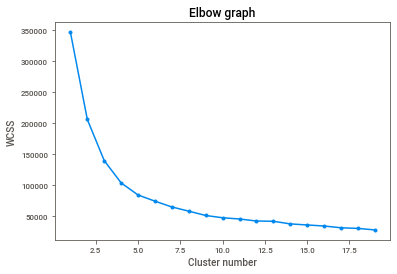

In [ ]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(clean_data_test)
    wcss.append(kmeans.inertia_)

%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(1,20), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
clean_data['Cluster'] = kmeans.fit_predict(clean_data_test)
a = clean_data.groupby('Cluster').count()
print(a)

         recency  frequency  monetary  Recency_Flag  Freq_Flag  Monetary_Flag
Cluster                                                                      
0           9564       9564      9564          9564       9564           9564
1          16810      16810     16810         16810      16810          16810
2          12184      12184     12184         12184      12184          12184
3          14044      14044     14044         14044      14044          14044
4           8458       8458      8458          8458       8458           8458
5          10941      10941     10941         10941      10941          10941


In [ ]:
round(pd.DataFrame(kmeans.cluster_centers_),2)

,0,1,2
0,4.49,1.65,4.23
1,1.71,1.15,1.44
2,4.62,1.18,1.72
3,3.23,1.15,2.91
4,4.52,3.57,4.85
5,2.11,2.04,4.31


Cluster 2為價值高的顧客群

In [ ]:
clean_data[clean_data.Cluster == 2]

,recency,frequency,monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster
MemberId,,,,,,,
++i4LZhGH7X7ZfrbRze2kuTlJ3WTmA4O1zFLTWfDhpY=,119,1,1759.0,4,1,2,2
+13O+MzhGFIAJU8dR8IVsZhI/W66Y1uLb9CDVlhdOKs=,2,1,1380.0,5,1,1,2
+1U2EwXFw/Fjr7fdeSBFJf8/IIl/4j3f7ZCrTt1f6/Q=,10,1,1380.0,5,1,1,2
+2AP592MCEqbJJMVTfYbNlplFhvUv2soKq0D3or6CrU=,35,1,1380.0,5,1,1,2
+2Y1TSNzChAPEOhU/JpiQuiknoNs5mbFH1ErL50DUd4=,71,1,2280.0,5,1,3,2
...,...,...,...,...,...,...,...
zyWeEkdJNAQIGc5vQMsytJSzA9xHMZzUoSfq4ZEuUZI=,51,1,2063.0,5,1,3,2
zyteqVnuSkGhcKwO7Ok13/OlaPtj2Lk9KM16BIyn+xg=,56,3,1580.0,5,3,2,2
zz1u9Egfa8Q60CDiit7p1liBo+100GweuvjejER79/k=,48,2,1680.0,5,2,2,2


### 加CAI 分群

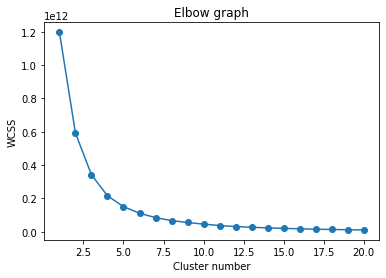

In [ ]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(RFM_and_CAI)
    wcss.append(kmeans.inertia_)

%matplotlib inline
import matplotlib.pyplot as plt 

plt.plot(range(1,21), wcss, marker='o')
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
RFM_and_CAI['Cluster'] = kmeans.fit_predict(RFM_and_CAI)
a = RFM_and_CAI.groupby('Cluster').count()
print(a)

         recency  frequency  monetary    CAI
Cluster                                     
0           5205       5205      5205   5205
1          43845      43845     43845  43845
2           1261       1261      1261   1261
3             56         56        56     56
4            279        279       279    279
5          21355      21355     21355  21355


In [ ]:
round(pd.DataFrame(kmeans.cluster_centers_),2)

,0,1,2,3
0,101.72,4.05,8152.09,-3.00
1,180.01,1.21,1527.86,-4.54
2,61.42,8.62,17134.56,-3.95
3,30.55,34.52,75974.27,-4.40
4,37.37,17.15,35278.19,-5.77
5,149.69,2.03,3771.73,-4.33


RFM改5等分法

In [ ]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=0)
RFM5_and_CAIt['Cluster'] = kmeans.fit_predict(RFM5_and_CAI)
a = RFM5_and_CAIt.groupby('Cluster').count()
print(a.recency)

NameError: ignored

In [ ]:
round(pd.DataFrame(kmeans.cluster_centers_),2)

## EDA

In [ ]:
# 快速對欄位EDA的模型，結果在雲端硬碟內
%pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 8.6 MB/s 


In [ ]:
import sweetviz as sv
report = sv.analyze(clean_data)
report.show_html(filepath='/content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/EDA.html')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/gdrive/Shareddrives/Big Data and Business Analytic/final_project/EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


No handles with labels found to put in legend.


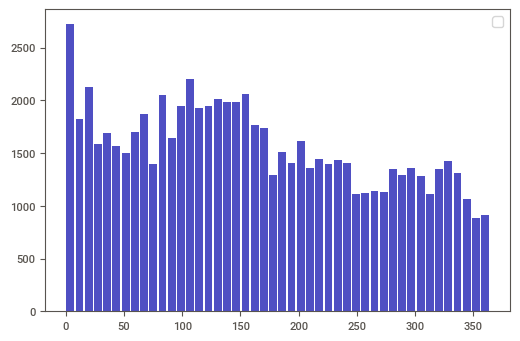

In [ ]:
plt.hist(clean_data.recency, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.legend()
plt.show()

No handles with labels found to put in legend.


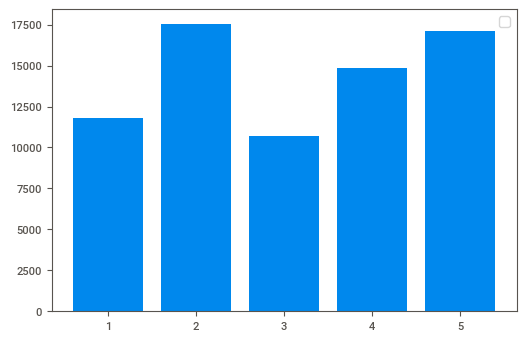

In [ ]:
plt.bar(clean_data.Recency_Flag.unique(), clean_data.Recency_Flag.value_counts())
plt.legend()
plt.show()

No handles with labels found to put in legend.


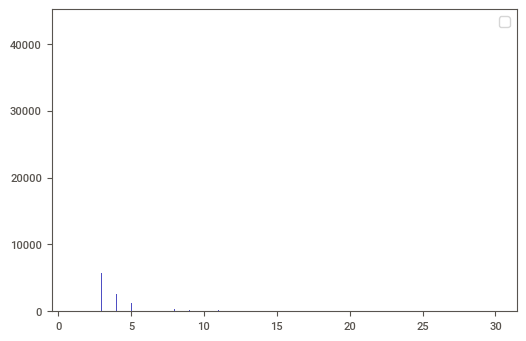

In [ ]:
plt.hist(clean_data.frequency, range=(1,30), bins='auto', color='#0504aa',alpha=0.7, rwidth=3)
plt.legend()
plt.show()

No handles with labels found to put in legend.


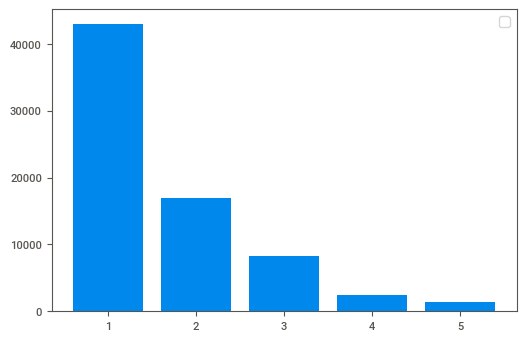

In [ ]:
plt.bar(clean_data.Freq_Flag.unique(), clean_data.Freq_Flag.value_counts())
plt.legend()
plt.show()

No handles with labels found to put in legend.


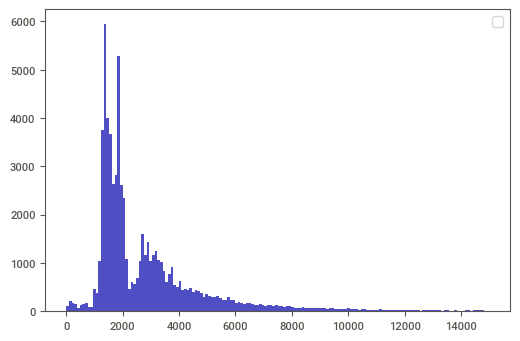

In [ ]:
plt.hist(clean_data.monetary, range=(1,15000), bins='auto', color='#0504aa',alpha=0.7, rwidth=3)
plt.legend()
plt.show()

No handles with labels found to put in legend.


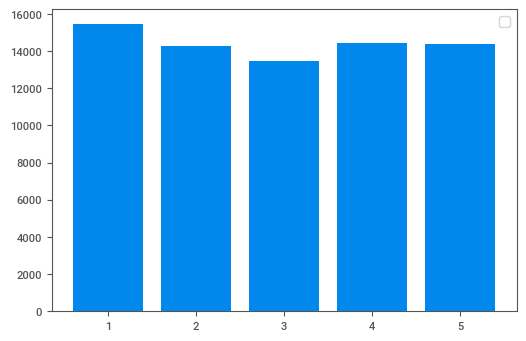

In [ ]:
plt.bar(clean_data.Monetary_Flag.unique(), clean_data.Monetary_Flag.value_counts())
plt.legend()
plt.show()

No handles with labels found to put in legend.


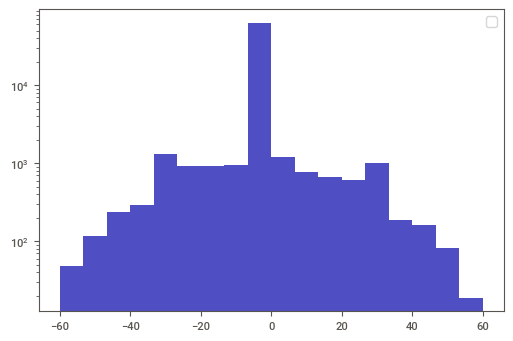

In [ ]:
plt.hist(RFM5_and_CAI.CAI, range=(-60,60), bins='auto', color='#0504aa',alpha=0.7, rwidth=3)
plt.yscale("log")
plt.legend()
plt.show()

##模型驗證

In [ ]:
#計算2021會員總數與cluster2總數
vip_customers = clean_data[clean_data.Cluster == 2]
all_customers_num = len(clean_data)
all_vip_num = len(clean_data[clean_data.Cluster == 2])
top_ratio = all_vip_num / all_customers_num
print(all_customers_num, all_vip_num, top_ratio)

72001 12184 0.16921987194622298


In [ ]:
#找出top22%的總購金額會員
top_rank = monetary.sort_values(by='SubtotalSalesAmount',ascending=False)
top_rank = top_rank.iloc[:all_vip_num]
top_rank

,SubtotalSalesAmount
MemberId,
tMGtR0T+8V+OZRi3h80VqIFnu5PLjjaxv+uAsDXLdPc=,184025.0
JK30jVAZ8KYuahCHO3+gx8wmcC0TuPKitaJg//SwTTs=,137503.0
l/r69vydRj8UP7LdhdqfsVemucbsykSXCtBlyyLtSvw=,128789.0
Wh8iu+mT2rtkeE7om3KMS/xkPC+HrPOtBhLIAEtMFD4=,114416.0
3JjHg6RqO7g3PE7ClcpsVwdVCQBtN1JUwR3LSBi26zs=,111937.0
...,...
2uA0Np49Uvwea87TmpsHx7ML0N/s+yBstCVRHyNb0Zc=,4390.0
kAYCIT9qKTr9nD3UhYHLWXXNh7ZgOy/KMG9dRvxlObU=,4390.0
QZlE0eod2MXrU2hZ3V1f457E80sKToc6HfiZO+uEa+4=,4390.0


In [ ]:
#與vip會員對照，找出占比人數
corresponse_sheet = pd.merge(vip_customers,top_rank, how='left',left_index=True, right_index=True)
corresponse_sheet = corresponse_sheet[corresponse_sheet.SubtotalSalesAmount.notna()]
corresponse_sheet

,recency,frequency,monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster,SubtotalSalesAmount
MemberId,,,,,,,,


In [ ]:
monetary_2022 = pd.DataFrame(proceeded_data_real.groupby('MemberId')['SubtotalSalesAmount'].sum())
monetary_2022

,SubtotalSalesAmount
MemberId,
++E2NeArhy1p1Mg1zhCDlWXE7KClTNvkw9KKoxe1Hpw=,5508.0
++IwJUZtK5mlLk6MT17ozx8EoUJ9hEn96UTAq6PJVio=,4010.0
++P3hhogUcwlFXNq/N/+F9UFR+XcIHzrhS82Nu5PqD8=,3204.0
++P4RiS8hWd2YNbXLhX2W4gw8Lcej7VkkkiB5AjrKHs=,1530.0
++Q1K2jMBO3jIpW0F0Yw4GZizaIK3qMqdz2ZZoCuuLE=,1880.0
...,...
zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,3534.0
zzpr4DLdeOxM9QJ9+C56UADVWTZ0IFwoZUwSrQngg1o=,5839.0
zzqhvBY+YSyGegI8y1DggBQQktvYAI55KCfrSlV+OZ8=,2410.0


In [ ]:
all_sheet = pd.merge(clean_data,monetary_2022,how='left',left_index=True, right_index=True)
all_sheet[all_sheet.SubtotalSalesAmount.notna()]

,recency,frequency,monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster,SubtotalSalesAmount
MemberId,,,,,,,,
++P3hhogUcwlFXNq/N/+F9UFR+XcIHzrhS82Nu5PqD8=,139,2,5216.0,4,2,5,0,3204.0
++P4RiS8hWd2YNbXLhX2W4gw8Lcej7VkkkiB5AjrKHs=,136,3,3760.0,4,3,4,4,1530.0
++i4LZhGH7X7ZfrbRze2kuTlJ3WTmA4O1zFLTWfDhpY=,119,1,1759.0,4,1,2,2,5519.0
+//bKxaJUfhagQS6v2Mtz05t9Lj0r0mZw26I+2FNkYE=,197,5,1280.0,3,4,1,1,0.0
+/OqAe8L6Olr4+rPgujIXxgfCkImD3+Ks52D+0uKBII=,273,3,2910.0,2,3,4,5,1780.0
...,...,...,...,...,...,...,...,...
zzDxaBctzlencSpoNRT+EejnHvnJylFnYbE1m42XT6c=,47,2,3491.0,5,2,4,0,3460.0
zzSe6Z7G/601LTG0AZZK9yPm9ET9LwMjSKRbDOa8zyI=,127,8,12517.0,4,5,5,4,1406.0
zzmJk8cyusu4lxiYqIFX0nI13QIMo9QXpfBbEiNJvNw=,4,7,10884.0,5,4,5,4,3534.0


In [ ]:
top_rank_2022 = monetary_2022.sort_values(by='SubtotalSalesAmount',ascending=False)
top_rank_2022 = top_rank_2022.iloc[:int(len(top_rank_2022)*top_ratio)]
top_rank_2022

,SubtotalSalesAmount
MemberId,
6McP2ch3K42cXKF0mLz20hnROfDe8NakmgbbJXerbes=,228891.0
Qe/z4r3K67xRT1nKhdbsQihX8Muz8kdCXAFxMB9nq+k=,196560.0
f5qQgBpx8x8tucjJAKxgB/jnpQ1B9LK3fzj/9ESBl/k=,141120.0
l/r69vydRj8UP7LdhdqfsVemucbsykSXCtBlyyLtSvw=,140945.0
F8ClQ24EfIDVC1+Lu66k9EBAQegHKowso6txKuNSUho=,128549.0
...,...
m5iaGYPsU89VA6A+uzOmpKoSYWeTUJ8Xfr5XvBzBenw=,4540.0
U6bbhDuxrkJIEohMI2c/nesHGFnlhJZvUMhcf2fR/gE=,4540.0
YMjVdrjWKcu6PY/A+8adzI0SuYarJaq3ClfCmfv67K0=,4540.0


In [ ]:
corresponse_sheet_2022 = pd.merge(vip_customers,top_rank_2022, how='left',left_index=True, right_index=True)
corresponse_sheet_2022 = corresponse_sheet_2022[corresponse_sheet_2022.SubtotalSalesAmount.notna()]
corresponse_sheet_2022

,recency,frequency,monetary,Recency_Flag,Freq_Flag,Monetary_Flag,Cluster,SubtotalSalesAmount
MemberId,,,,,,,,
++i4LZhGH7X7ZfrbRze2kuTlJ3WTmA4O1zFLTWfDhpY=,119,1,1759.0,4,1,2,2,5519.0
+F1m2XLyyX0gg3vvHlGGB7Ieu6LDUFl0T7jZpLYEdzs=,8,1,1280.0,5,1,1,2,6420.0
+FSQ/z8os+SrpLLTbL3S5gfuU5slmpqYJ9BdLgywGH8=,13,2,1530.0,5,2,2,2,5590.0
+OhM/OGH5fhftisLSZy4KHNuzidY2e98c+e3m8+o0BE=,30,1,1380.0,5,1,1,2,7320.0
+Xmuk0L5T8xYWuzPXVidhD3VSCsDI91fQfJNA2TIaRc=,70,4,0.0,5,3,1,2,4630.0
...,...,...,...,...,...,...,...,...
zRNdqxtdfC4S1KWaqDjLFRDwOWjKxiB2hIGP3sMd+Q0=,103,1,200.0,4,1,1,2,11544.0
zTTs7o4GSoy65AAOGUKgBI7+QQ0d7L2YG2kxdLr9CJ8=,21,1,1619.0,5,1,2,2,7536.0
znOWscDUtphRvLzaY8qLH3PFJaq1/bYTKk5Z9dt50ro=,82,1,1680.0,4,1,2,2,12568.0


得出2021,2022 vip顧客佔前22%購買力的比重


In [ ]:
#算出兩年vip顧客分別佔前22%人數佔比
Ration_in_top_2021 = len(corresponse_sheet) / len(top_rank)
Ration_in_top_2022 = len(corresponse_sheet_2022) / len(top_rank_2022)
print(Ration_in_top_2021,Ration_in_top_2022)

0.0 0.03689438475572674


# 換個方式驗證



計算各cluster佔總金額貢獻程度，結果如下:

In [ ]:
def cluster_buyingpower():
  all_customers_num = len(clean_data)
  all_customers_monetary = clean_data['monetary'].sum()
  cluster_numlist =[]
  proportion_list =[]
  cluster_monetary=[]
  name_list=[]
  Mratio_list=[]
  for i in range(0,6):
    num = len(clean_data[clean_data.Cluster == i])
    Msum = clean_data[clean_data.Cluster == i]['monetary'].sum()
    cluster_numlist.append(num)
    proportion_list.append(num / all_customers_num)
    cluster_monetary.append(Msum)
    Mratio_list.append(Msum/all_customers_monetary)
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, proportion_list,Mratio_list)), columns = ['Name', 'proportion','Mratio'])
  print(result)
cluster_buyingpower()

       Name  proportion    Mratio
0  cluster0    0.132831  0.159832
1  cluster1    0.233469  0.092335
2  cluster2    0.169220  0.073853
3  cluster3    0.195053  0.128203
4  cluster4    0.117471  0.352255
5  cluster5    0.151956  0.193521


比較兩年各項成效，結果如下:

In [ ]:
def between_performace():
  twoyearsheet = pd.merge(clean_data,monetary_2022, how='left',left_index=True, right_index=True)
  twoyearsheet2 = twoyearsheet[twoyearsheet.SubtotalSalesAmount.notna()]
  cluster_numlist2021 = []
  cluster_avgmontary2021 = []
  cluster_numlist2022 = []
  cluster_avgmontary2022 = []
  Retention_rate = []
  name_list = []
  for i in range(0,6):
    num_2021 = len(twoyearsheet[twoyearsheet.Cluster == i])
    Msum_2021 = twoyearsheet[twoyearsheet.Cluster == i]['monetary'].sum()
    num_2022 = len(twoyearsheet2[twoyearsheet2.Cluster == i])
    Msum_2022 = twoyearsheet2[twoyearsheet2.Cluster == i]['monetary'].sum()
    cluster_numlist2021.append(num_2021)
    cluster_avgmontary2021.append(Msum_2021/num_2021)
    cluster_numlist2022.append(num_2022)
    cluster_avgmontary2022.append(Msum_2022/num_2022)
    Retention_rate.append(num_2022/num_2021)
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, cluster_numlist2021,cluster_numlist2022,cluster_avgmontary2021,cluster_avgmontary2022,Retention_rate))
           , columns = ['Name', '2021會員人數','2022會員人數','2021人年均購買力','2022人年均購買力','留存率'])
  return result
between_performace()

,Name,2021會員人數,2022會員人數,2021人年均購買力,2022人年均購買力,留存率
0,cluster0,9564,2825,3771.286941,3973.811681,0.295379
1,cluster1,16810,2444,1239.543783,1246.632160,0.145390
2,cluster2,12184,2380,1367.871553,1382.842437,0.195338
3,cluster3,14044,2225,2060.031615,2080.795056,0.158431
4,cluster4,8458,4872,9398.421282,11371.970690,0.576023
5,cluster5,10941,2592,3991.500320,4348.676312,0.236907


In [ ]:
member_dataset = proceeded_data.groupby('MemberId')

for i in member_dataset.size():
  print(i)
  break

2


## CAI

In [ ]:
RFM5_and_CAIt

NameError: ignored

In [ ]:
def cluster_buyingpower():
  all_customers_num = len(RFM5_and_CAIt)
  all_customers_monetary = RFM5_and_CAIt['monetary'].sum()
  cluster_numlist =[]
  proportion_list =[]
  cluster_monetary=[]
  name_list=[]
  Mratio_list=[]
  for i in range(0,6):
    num = len(RFM5_and_CAIt[RFM5_and_CAIt.Cluster == i])
    Msum = RFM5_and_CAIt[RFM5_and_CAIt.Cluster == i]['monetary'].sum()
    cluster_numlist.append(num)
    proportion_list.append(num / all_customers_num)
    cluster_monetary.append(Msum)
    Mratio_list.append(Msum/all_customers_monetary)
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, proportion_list,Mratio_list)), columns = ['Name', 'proportion','Mratio'])
  print(result)
cluster_buyingpower()

In [ ]:
pd.merge(RFM5_and_CAIt,monetary_2022, how='left',left_index=True, right_index=True)

In [ ]:
def between_performace():
  twoyearsheet = pd.merge(RFM5_and_CAIt,monetary_2022, how='left',left_index=True, right_index=True)
  twoyearsheet2 = twoyearsheet[twoyearsheet.SubtotalSalesAmount.notna()]
  cluster_numlist2021 = []
  cluster_avgmontary2021 = []
  cluster_numlist2022 = []
  cluster_avgmontary2022 = []
  Retention_rate = []
  name_list = []
  for i in range(0,6):
    num_2021 = len(twoyearsheet[twoyearsheet.Cluster == i])
    Msum_2021 = twoyearsheet[twoyearsheet.Cluster == i]['monetary'].sum()
    num_2022 = len(twoyearsheet2[twoyearsheet2.Cluster == i])
    Msum_2022 = twoyearsheet2[twoyearsheet2.Cluster == i]['monetary'].sum()
    cluster_numlist2021.append(num_2021)
    cluster_avgmontary2021.append(Msum_2021/num_2021)
    cluster_numlist2022.append(num_2022)
    cluster_avgmontary2022.append(Msum_2022/num_2022)
    Retention_rate.append(num_2022/num_2021)
    name_list.append(f"cluster{i}")
  result = pd.DataFrame((zip(name_list, cluster_numlist2021,cluster_numlist2022,cluster_avgmontary2021,cluster_avgmontary2022,Retention_rate))
           , columns = ['Name', '2021會員人數','2022會員人數','2021人年均購買力','2022人年均購買力','留存率'])
  return result
between_performace()